In [143]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.diagnostic import het_breuschpagan
import seaborn as sns

In [2]:
data_fpath = '/Users/jbachlombardo/Documents/Personal/HES - Stats 104/Homeworks/HW7/Data/'

<b><font size=4>Question 1</font></b>

In [51]:
people = np.array([2,3,7,9,10,10,12,15,16,20])
sales = np.array([10,11,13,14,18,20,20,22,22,26])
df = pd.DataFrame(data = {'People': people, 'Sales': sales})

In [52]:
print ('c)')
lm = smf.ols('Sales ~ People', data = df).fit()
rse = np.sqrt(lm.scale)
rse

c)


1.4770119315056516

d)


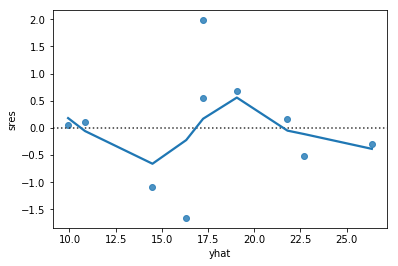

In [53]:
print ('d)')
e = lm.resid
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 2</font></b>

In [54]:
x=np.array([-4,-2,1,3,-1,-5,4,2,0,-3,5])
y=np.array([16,4,1,9,1,25,16,4,0,9,25])

a)


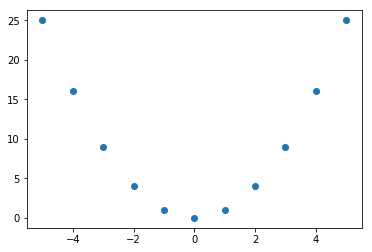

In [55]:
print ('a)')
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [56]:
print ('b) and c)')
lm = sm.OLS(y, sm.add_constant(x)).fit()
lm.summary()

b) and c)


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.111
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               1.00
Time:                        12:43:55   Log-Likelihood:                -39.570
No. Observations:                  11   AIC:                             83.14
Df Residuals:                       9   BIC:                             83.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.944      3.397      0.008       3.340      16.660
x1         -4.441e-16      0.931  -4.77e-16      1.000      -2.106       2.106
==============================================================================
Omnibus:                        1.593   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.107
Skew:                           0.566   Prob(JB):                        0.575
Kurtosis:                       1.936   Cond. No.                         3.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e)


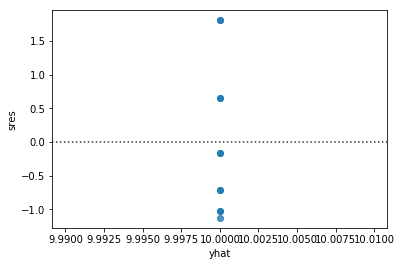

In [57]:
print ('e)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 3</font></b>

In [58]:
df = pd.read_csv(data_fpath + 'tire.csv')

In [61]:
print ('a)')
lm = smf.ols('mileage ~ psi', data = df).fit()
print ('RSE:', np.sqrt(lm.scale))
lm.summary()

a)
RSE: 3.9097558077443257


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mileage   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                    0.1572
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.699
Time:                        12:46:37   Log-Likelihood:                -37.875
No. Observations:                  14   AIC:                             79.75
Df Residuals:                      12   BIC:                             81.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.3500     17.273      2.336      0.038       2.716      77.984
psi           -0.2071      0.522     -0.396      0.699      -1.345       0.931
==============================================================================
Omnibus:                        2.415   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                1.247
Skew:                          -0.392   Prob(JB):                        0.536
Kurtosis:                       1.766   Cond. No.                         547.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b)


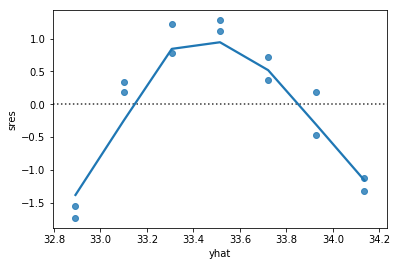

In [60]:
print ('b)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

In [62]:
print ('c)')
lm2 = smf.ols('mileage ~ psi + np.power(psi, 2)', data = df).fit()
print ('RSE:', np.sqrt(lm2.scale))
lm2.summary()

c)
RSE: 1.1048789869291673


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mileage   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     70.62
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           5.30e-07
Time:                        12:47:06   Log-Likelihood:                -19.573
No. Observations:                  14   AIC:                             45.15
Df Residuals:                      11   BIC:                             47.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1051.1083     92.618    -11.349      0.000   -1254.958    -847.258
psi                 66.1857      5.628     11.760      0.000      53.799      78.573
np.power(psi, 2)    -1.0060      0.085    -11.801      0.000      -1.194      -0.818
==============================================================================
Omnibus:                        1.181   Durbin-Watson:                   2.520
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                0.995
Skew:                          -0.522   Prob(JB):                        0.608
Kurtosis:                       2.217   Cond. No.                     3.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d)


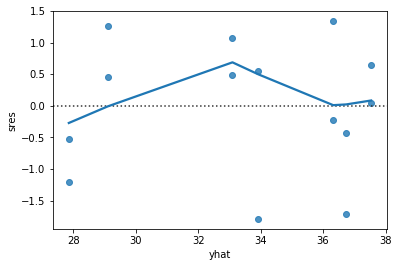

In [63]:
print ('d)')
yhat = lm2.fittedvalues
sres = lm2.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 4</font></b>

In [65]:
df = pd.read_csv(data_fpath + 'engine.csv')

In [67]:
print ('b)')
lm = smf.ols('mpg ~ size', data = df).fit()
print ('RSE:', np.sqrt(lm.scale))
lm.summary()

b)
RSE: 4.410348316574396


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     15.61
Date:                Sat, 20 Apr 2019   Prob (F-statistic):            0.00335
Time:                        13:47:54   Log-Likelihood:                -30.828
No. Observations:                  11   AIC:                             65.66
Df Residuals:                       9   BIC:                             66.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6770      2.909     12.952      0.000      31.097      44.258
size          -0.0724      0.018     -3.951      0.003      -0.114      -0.031
==============================================================================
Omnibus:                        0.656   Durbin-Watson:                   2.779
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.575
Skew:                          -0.158   Prob(JB):                        0.750
Kurtosis:                       1.925   Cond. No.                         347.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print ('c)')
e = lm.resid
print ('sum of residuals to 10 decimal points: {:.10f}'.format(e.sum()))
print ('full sum of residuals: {}'.format(e.sum()))

c)
sum of residuals to 10 decimal points: 0.0000000000
full sum of residuals: 1.2079226507921703e-13


d)


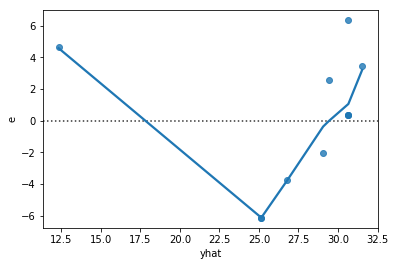

In [79]:
print ('d)')
yhat = lm.fittedvalues
fig, ax = plt.subplots()
sns.residplot(yhat, e, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('e')
plt.show()

d) continued


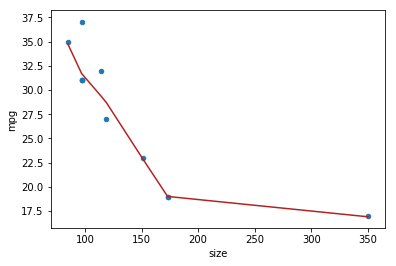

In [83]:
print ('d) continued')
endog_y = df['mpg'].values
exog_x = df['size'].values
lowess_sorted = lowess(endog_y, exog_x)
x = [x[0] for x in lowess_sorted]
y = [y[1] for y in lowess_sorted]
fig, ax = plt.subplots()
ax.plot(x, y, c = 'firebrick')
df.plot.scatter(x = 'size', y = 'mpg', ax = ax)
plt.show()

<b><font size=4>Question 5</font></b>

In [87]:
df = pd.read_csv(data_fpath + 'gpa.csv')

a)


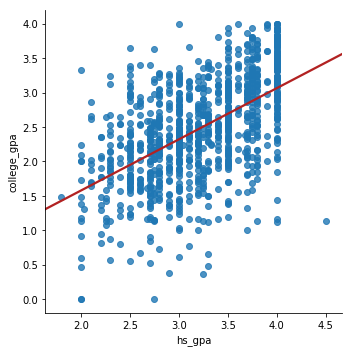

In [93]:
print ('a)')
sns.lmplot(x = 'hs_gpa', y = 'college_gpa', data = df, ci = None, line_kws = {'color': 'firebrick'})

In [94]:
print ('b)')
lm = smf.ols('college_gpa ~ hs_gpa', data = df).fit()
lm.summary()

b)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            college_gpa   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     418.1
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           6.93e-78
Time:                        14:00:51   Log-Likelihood:                -943.48
No. Observations:                1000   AIC:                             1891.
Df Residuals:                     998   BIC:                             1901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0913      0.118      0.775      0.439      -0.140       0.323
hs_gpa         0.7431      0.036     20.447      0.000       0.672       0.814
==============================================================================
Omnibus:                       31.526   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.428
Skew:                          -0.410   Prob(JB):                     3.34e-08
Kurtosis:                       3.391   Cond. No.                         21.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
print ('c)')
rse = np.sqrt(lm.scale)
print ('RSE:', rse)

c)
RSE: 0.6222204107474466


d)


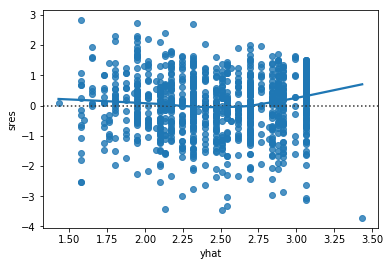

In [96]:
print ('d)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 6</font></b>

In [97]:
df = pd.read_csv(data_fpath + 'explorer.csv')

a)


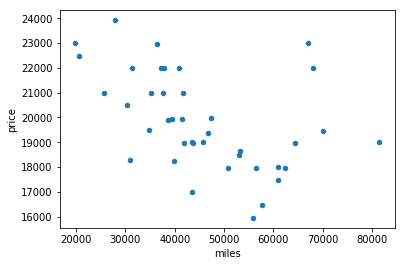

In [99]:
print ('a)')
df.plot.scatter(x = 'miles', y = 'price')

b)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     10.51
Date:                Sat, 20 Apr 2019   Prob (F-statistic):            0.00247
Time:                        14:23:09   Log-Likelihood:                -354.57
No. Observations:                  40   AIC:                             713.1
Df Residuals:                      38   BIC:                             716.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.279e+04    946.099     24.088      0.000    2.09e+04    2.47e+04
miles         -0.0644      0.020     -3.242      0.002      -0.105      -0.024
==============================================================================
Omnibus:                        1.839   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.274
Skew:                           0.436   Prob(JB):                        0.529
Kurtosis:                       3.050   Cond. No.                     1.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

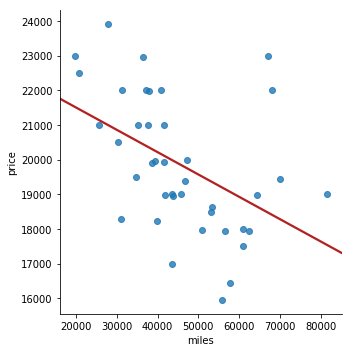

In [107]:
print ('b)')
lm = smf.ols('price ~ miles', data = df).fit()
sns.lmplot(x = 'miles', y = 'price', data = df, ci = None, line_kws = {'color': 'firebrick'})
lm.summary()

c)


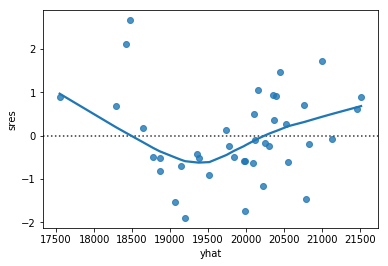

In [102]:
print ('c)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

In [104]:
print ('d)')
print ('90% conf int value:', stats.norm.ppf(0.95))

d)
90% conf int value: 1.6448536269514722


In [108]:
print ('e)')
rse = np.sqrt(lm.scale)
print ('RSE:', rse)
base = 22790 - (0.0644 * 36000)
ci_lo = base - (1.96 * rse)
ci_hi = base + (1.96 * rse)
print ('CI:', (ci_lo, ci_hi))

e)
RSE: 1756.1596273324014
CI: (17029.52713042849, 23913.672869571506)


<b><font size=4>Question 7</font></b>

In [110]:
df = pd.read_csv(data_fpath + 'height.csv')

a)


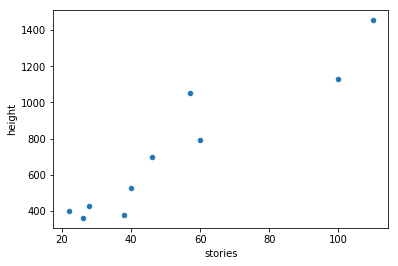

In [112]:
print ('a)')
df.plot.scatter(x = 'stories', y = 'height')

In [113]:
print ('b)')
lm = smf.ols('height ~ stories', data = df).fit()
print ('RSE:', np.sqrt(lm.scale))
lm.summary()

b)
RSE: 132.76438827596021


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     64.95
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           4.14e-05
Time:                        14:30:09   Log-Likelihood:                -61.959
No. Observations:                  10   AIC:                             127.9
Df Residuals:                       8   BIC:                             128.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.4287     87.606      1.169      0.276     -99.591     304.449
stories       11.7585      1.459      8.059      0.000       8.394      15.123
==============================================================================
Omnibus:                        4.153   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                1.233
Skew:                           0.793   Prob(JB):                        0.540
Kurtosis:                       3.668   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f)


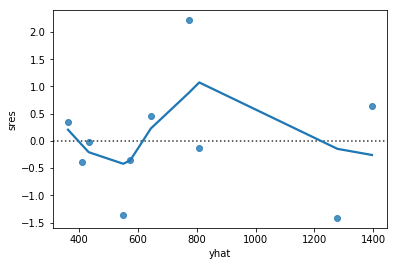

In [114]:
print ('f)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 8</font></b>

In [115]:
df = pd.read_csv(data_fpath + 'playbill.csv')

In [117]:
print ('a)')
lm = smf.ols('CurrentWeek ~ LastWeek', data = df).fit()
lm.summary()

a)


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            CurrentWeek   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     4634.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           3.87e-21
Time:                        15:33:38   Log-Likelihood:                -200.85
No. Observations:                  18   AIC:                             405.7
Df Residuals:                      16   BIC:                             407.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6804.8860   9929.318      0.685      0.503   -1.42e+04    2.79e+04
LastWeek       0.9821      0.014     68.071      0.000       0.951       1.013
==============================================================================
Omnibus:                        1.260   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.251
Skew:                           0.231   Prob(JB):                        0.882
Kurtosis:                       3.347   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d)


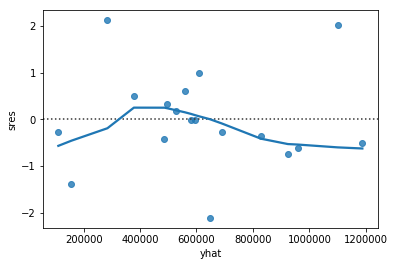

In [120]:
print ('d)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 9</font></b>

In [133]:
df = pd.read_csv(data_fpath + 'delivery.csv')

In [136]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [137]:
print ('a)')
lm = smf.ols('Delivery_Time ~ Number_of_Cases', data = df).fit()
lm.summary()

a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     619.2
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           2.15e-15
Time:                        15:49:33   Log-Likelihood:                -41.053
No. Observations:                  20   AIC:                             86.11
Df Residuals:                      18   BIC:                             88.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.8345      1.054     23.557      0.000      22.620      27.049
Number_of_Cases     0.1400      0.006     24.884      0.000       0.128       0.152
==============================================================================
Omnibus:                        4.029   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                2.012
Skew:                          -0.651   Prob(JB):                        0.366
Kurtosis:                       3.849   Cond. No.                         445.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

c)


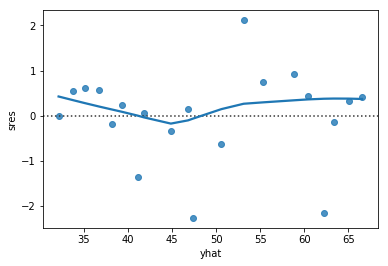

In [138]:
print ('c)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

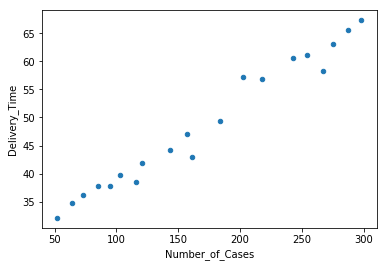

In [140]:
df.plot.scatter(x = 'Number_of_Cases', y = 'Delivery_Time')

In [157]:
print ('e)')
print ('resids are normal (null = normal): pval = {}'.format(stats.anderson(lm.resid)[0]))
_, p_val, __, f_p_val = het_breuschpagan(lm.resid, lm.model.exog)
print ('pval on resids (studentized, aligns with bptest(studentize = True) not ncvTest) (null = homo):', f_p_val)

e)
resids are normal (null = normal): pval = 0.885694054429834
pval on resids (studentized, aligns with bptest(studentize = True) not ncvTest) (null = homo): 0.4428474243267956


In [158]:
print ('h)')
rse = np.sqrt(lm.scale)
print ('RSE:', rse)
base = 24.835 + (0.140 * 150)
ci_lo = base - (1.96 * rse)
ci_hi = base + (1.96 * rse)
print ('CI:', (ci_lo, ci_hi))

h)
RSE: 1.9865029822874876
CI: (41.94145415471653, 49.728545845283485)


<b><font size=4>Question 10</font></b>

In [181]:
df = pd.read_csv(data_fpath + 'nbavalues.csv')

In [182]:
print ('a)')
lm = smf.ols('Value ~ Revenue', data = df).fit()
lm.summary()

a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1446.
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           1.21e-25
Time:                        17:15:49   Log-Likelihood:                -119.83
No. Observations:                  30   AIC:                             243.7
Df Residuals:                      28   BIC:                             246.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2448     10.126     -0.617      0.542     -26.987      14.497
Revenue        2.9576      0.078     38.021      0.000       2.798       3.117
==============================================================================
Omnibus:                       25.378   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.403
Skew:                           1.842   Prob(JB):                     1.87e-11
Kurtosis:                       8.095   Cond. No.                         531.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
print ('f)')
rse = np.sqrt(lm.scale)
print ('RSE:', rse)
pred_val_x = 150
base = lm.params[0] + (lm.params[1] * pred_val_x)
ci_lo = base - (1.96 * rse)
ci_hi = base + (1.96 * rse)
print ('CI:', (ci_lo, ci_hi))

f)
RSE: 13.596465205535585
CI: (410.74099326909584, 464.0391368747953)


g)


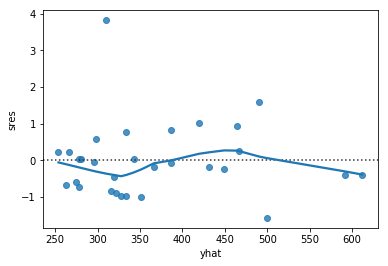

In [184]:
print ('g)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b>h) soccer team values</b>

In [185]:
df_soccer = pd.read_csv(data_fpath + 'soccervalues.csv')

In [186]:
df_soccer.columns = ['Team', 'Country', 'Revenue', 'Value']

In [187]:
print ('a)')
lm_soccer = smf.ols('Value ~ Revenue', data = df_soccer).fit()
lm_soccer.summary()

a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     65.73
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           2.02e-07
Time:                        17:15:56   Log-Likelihood:                -134.42
No. Observations:                  20   AIC:                             272.8
Df Residuals:                      18   BIC:                             274.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -219.2456    115.190     -1.903      0.073    -461.250      22.759
Revenue        3.0757      0.379      8.108      0.000       2.279       3.873
==============================================================================
Omnibus:                       14.116   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.043
Skew:                           1.352   Prob(JB):                     0.000892
Kurtosis:                       6.088   Cond. No.                         739.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
print ('f)')
rse = np.sqrt(lm_soccer.scale)
print ('RSE:', rse)
pred_val_x = 150
base = lm_soccer.params[0] + (lm_soccer.params[1] * pred_val_x)
ci_lo = base - (1.96 * rse)
ci_hi = base + (1.96 * rse)
print ('CI:', (ci_lo, ci_hi))

f)
RSE: 211.59491977721828
CI: (-172.6231149377466, 656.828970588949)


g)


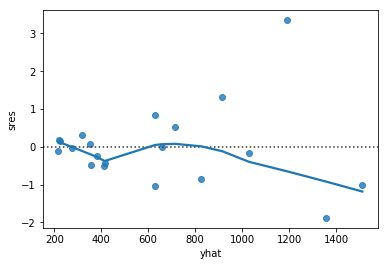

In [189]:
print ('g)')
yhat = lm_soccer.fittedvalues
sres = lm_soccer.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 11</font></b>

In [190]:
df = pd.read_csv(data_fpath + 'food.csv')

In [192]:
print ('a)')
lm = smf.ols('food ~ people + income + teens', data = df).fit()
lm.summary()

a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   food   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     10.61
Date:                Sat, 20 Apr 2019   Prob (F-statistic):           1.57e-05
Time:                        17:21:12   Log-Likelihood:                -345.74
No. Observations:                  55   AIC:                             699.5
Df Residuals:                      51   BIC:                             707.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    592.6149     90.491      6.549      0.000     410.947     774.283
people        44.2289     12.209      3.623      0.001      19.719      68.739
income         0.2522      0.070      3.611      0.001       0.112       0.392
teens         27.8032     24.502      1.135      0.262     -21.387      76.993
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.787
Skew:                           0.815   Prob(JB):                      0.00750
Kurtosis:                       4.271   Cond. No.                     5.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
print ('d)')
lm.params[0] + lm.params[1]*5 + lm.params[2]*1200 + lm.params[3]*1

d)


1144.2349360168714

f)


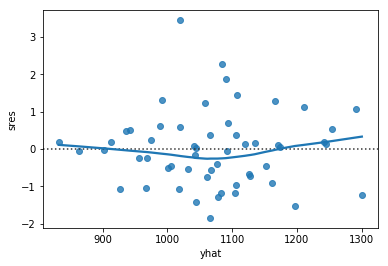

In [197]:
print ('f)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 12</font></b>

In [198]:
df = pd.read_csv(data_fpath + 'laptops.csv')

In [203]:
print ('a)')
lm = smf.ols('price ~ screensize + ram + harddrive + usbports + weight', data = df).fit()
lm.summary()

a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.514
Date:                Sat, 20 Apr 2019   Prob (F-statistic):              0.200
Time:                        17:35:18   Log-Likelihood:                -477.99
No. Observations:                  63   AIC:                             968.0
Df Residuals:                      57   BIC:                             980.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    761.4987    946.954      0.804      0.425   -1134.744    2657.741
screensize     4.1113     96.206      0.043      0.966    -188.539     196.761
ram           12.8642     74.411      0.173      0.863    -136.141     161.870
harddrive      0.6561      0.459      1.429      0.159      -0.263       1.576
usbports    -206.5346    123.563     -1.671      0.100    -453.965      40.896
weight        51.6251     99.210      0.520      0.605    -147.040     250.290
==============================================================================
Omnibus:                        9.835   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.384
Skew:                           0.993   Prob(JB):                      0.00556
Kurtosis:                       3.102   Cond. No.                     8.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

d)


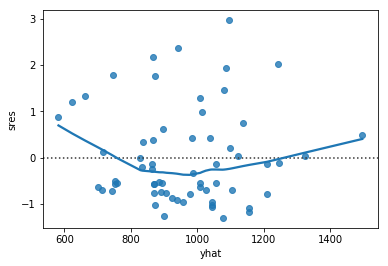

In [204]:
print ('d)')
yhat = lm.fittedvalues
sres = lm.get_influence().resid_studentized_internal
fig, ax = plt.subplots()
sns.residplot(yhat, sres, lowess = True, ax = ax)
ax.set_xlabel('yhat')
ax.set_ylabel('sres')
plt.show()

<b><font size=4>Question 13</font></b>

In [206]:
df = pd.read_csv(data_fpath + 'aapl.csv')

a)


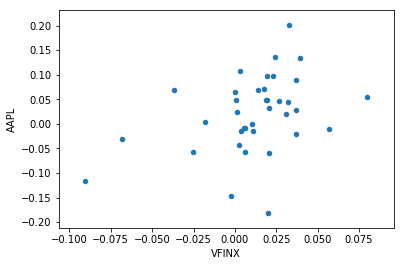

In [210]:
print ('a)')
df.plot.scatter(x = 'VFINX', y = 'AAPL')

In [211]:
print ('b)')
lm = smf.ols('AAPL ~ VFINX', data = df).fit()
lm.summary()

b)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     5.902
Date:                Sat, 20 Apr 2019   Prob (F-statistic):             0.0204
Time:                        17:45:31   Log-Likelihood:                 45.422
No. Observations:                  37   AIC:                            -86.84
Df Residuals:                      35   BIC:                            -83.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0097      0.013      0.762      0.451      -0.016       0.036
VFINX          0.9606      0.395      2.429      0.020       0.158       1.763
==============================================================================
Omnibus:                        4.478   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.151
Skew:                          -0.513   Prob(JB):                        0.207
Kurtosis:                       3.997   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
0.9606 - 1.96*0.395

0.1864